# **Decoding the neural activity of a visual task**

## First steps in decoding

### Data and module importation

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
timesteps = np.arange(-.2, .4, .01)
B_thetas = np.linspace(np.pi/2, 0 , 8)/ 2.5
colors=plt.cm.inferno(np.linspace(.8, .2, len(B_thetas)))
cluster_all = np.load("/home/alexandre/Documents/Decoding/postprocessing/data/paper_2023_postprocess/cluster_list.npy",allow_pickle = True)
cluster=cluster_all
winsize=.1

In [92]:
Matrice_theta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_theta.npy")[0]
Scores_mean_theta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_theta.npy")[0]
Scores_sd_theta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_theta.npy")[0]

Matrice_theta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_theta_equal.npy")[0] #data max = 10, nbr bins = 10
Scores_mean_theta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_theta_equal.npy")[0]
Scores_sd_theta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_theta_equal.npy")[0]

Matrice_theta_equal_2=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_theta_equal_2.npy")[0] #data max = 20, nbr bins = 20
Scores_mean_theta_equal_2=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_theta_equal_2.npy")[0]
Scores_sd_theta_equal_2=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_theta_equal_2.npy")[0]

Matrice_btheta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_btheta.npy")[0]
Scores_mean_btheta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_btheta.npy")[0]
Scores_sd_btheta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_btheta.npy")[0]

Matrice_btheta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_btheta_equal.npy")[0] #data max = 10, nbr bins = 10
Scores_mean_btheta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_btheta_equal.npy")[0]
Scores_sd_btheta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_btheta_equal.npy")[0]

Matrice_theta_btheta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_theta_btheta.npy")[0]
Scores_mean_theta_btheta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_theta_btheta.npy")[0]
Scores_sd_theta_btheta=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_theta-btheta.npy")[0]

Matrice_theta_btheta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Matrices_decoding_theta_btheta_equal.npy")[0] #data max = 10, nbr bins = 10
Scores_mean_theta_btheta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_mean_decoding_theta_btheta_equal.npy")[0]
Scores_sd_theta_btheta_equal=np.load("/home/alexandre/Documents/Decoding/postprocessing/data/Scores_sd_decoding_theta-btheta_equal.npy")[0]

### Décoding the $\theta$ orientation for an increasing noise $B_\theta$.

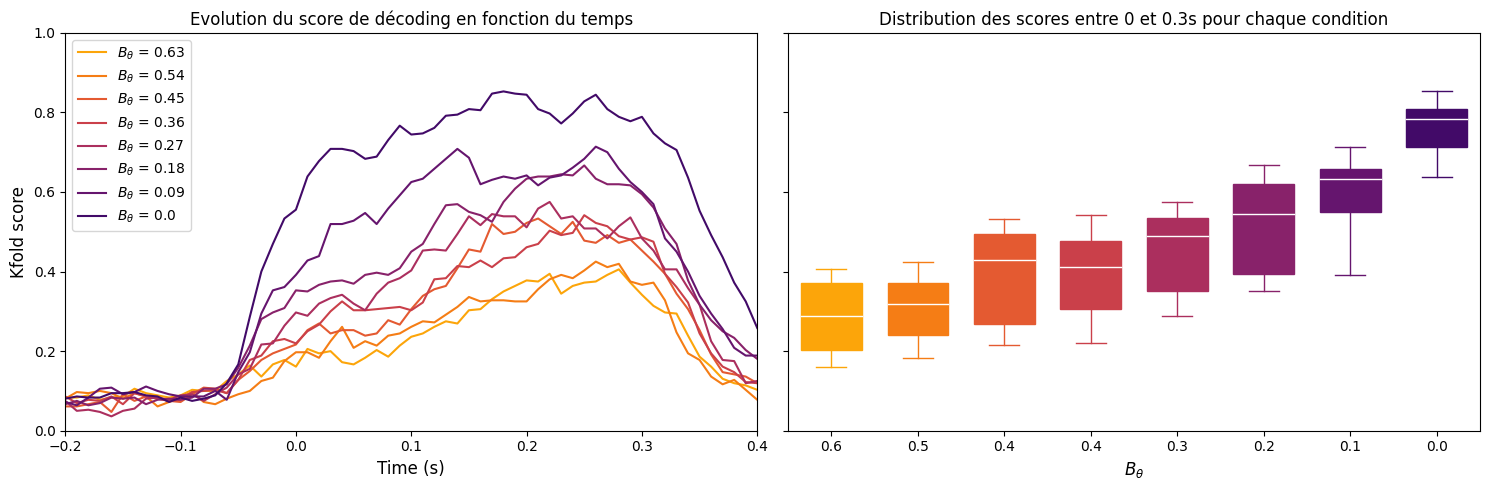

In [93]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
#ax[0].hlines(0.5,timesteps.min(),timesteps.max(),linestyle="--",color="red")
for i in range(len(B_thetas)):
    ax[0].plot(timesteps,Scores_mean_theta[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
    #ax[0].fill_between(timesteps,Scores_mean_theta[:,i]-Scores_sd_theta[:,i],Scores_mean_theta[:,i]+Scores_sd_theta[:,i],color=colors[i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],1)))
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

#ax[1].hlines(0.5,0,7,linestyle="--",color="red")
for i in range(len(B_thetas)):
    ax[1].boxplot(Scores_mean_theta[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=colors[i], color=colors[i]),
                  capprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]),
                  flierprops=dict(color=colors[i], markeredgecolor=colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(B_thetas[i],1) for i in range(len(B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)

plt.tight_layout()
plt.show()

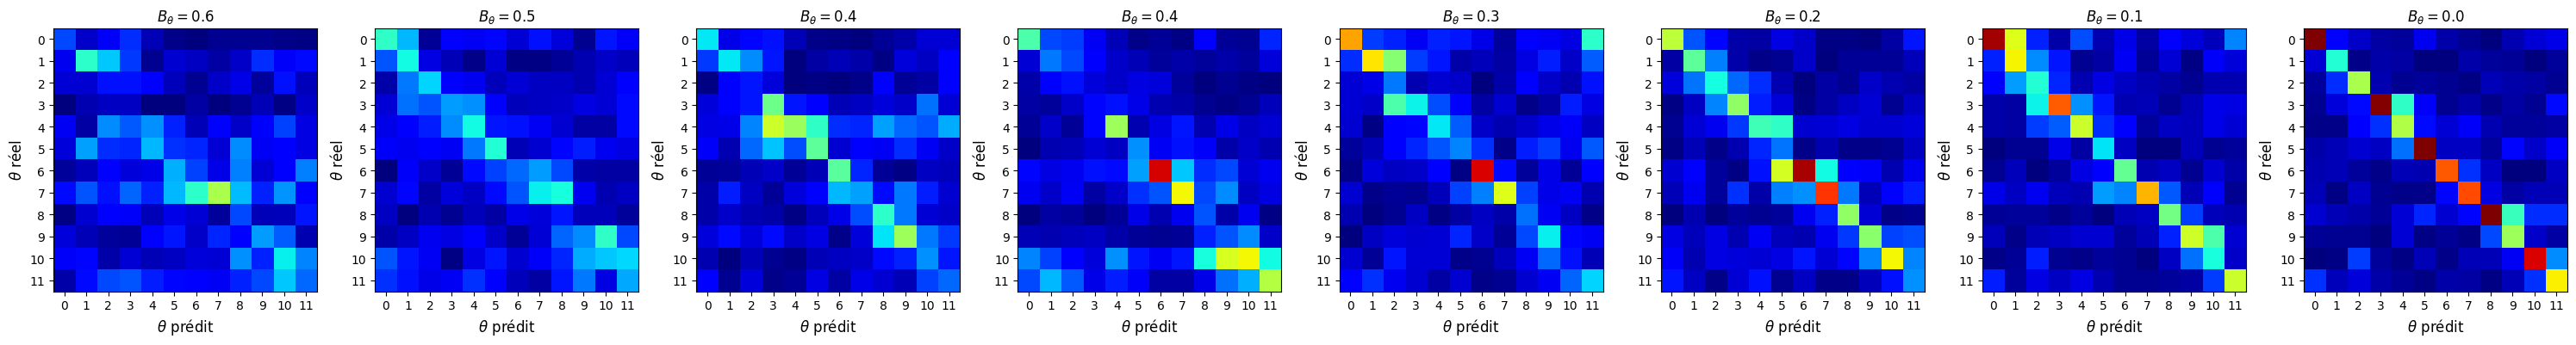

In [94]:
fig,ax=plt.subplots(1,8,figsize=(30,5))
for i in range(len(B_thetas)):
    graph=ax[i].imshow(Matrice_theta[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(B_thetas[i],1)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,12))
    ax[i].set_yticks(range(0,12))
plt.tight_layout()
plt.show()

### Decoding the noise $B_\theta$ from différents orientations activity $\theta$.

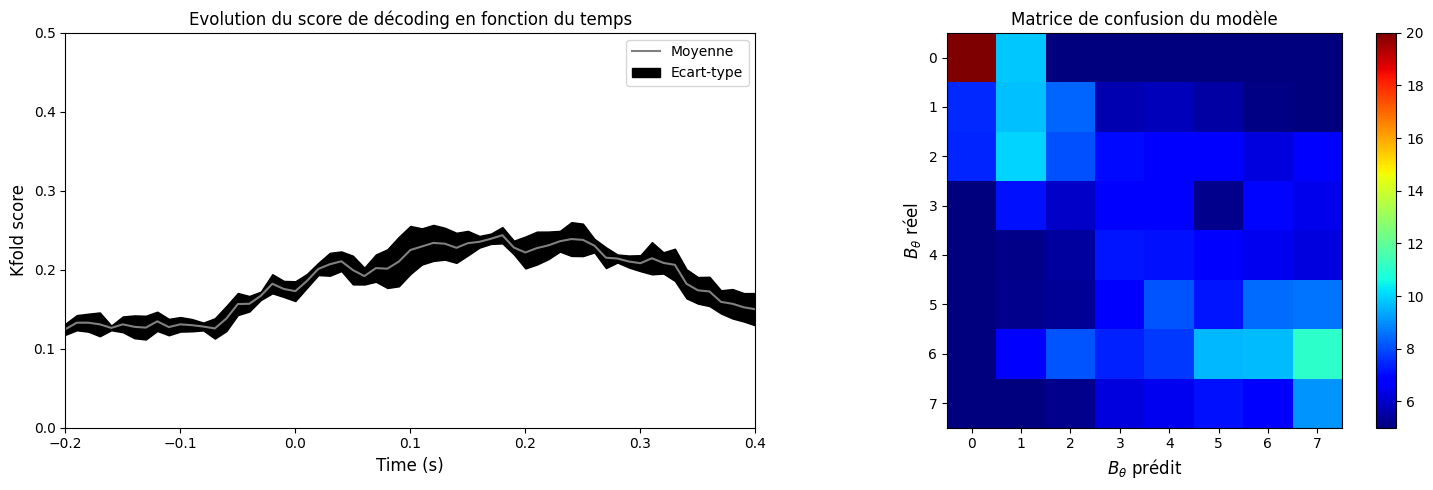

In [95]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
#fig.set_dpi(1400)
ax[0].plot(timesteps,Scores_mean_btheta,color="grey",label="Moyenne")
ax[0].fill_between(timesteps,Scores_mean_btheta-Scores_sd_btheta,Scores_mean_btheta+Scores_sd_btheta,label="Ecart-type",color="black")
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,0.5)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

graph=ax[1].imshow(Matrice_btheta,cmap="jet",vmin=5,vmax=20)
ax[1].set_xlabel(r"$B_\theta$ prédit",size=12)
ax[1].set_ylabel(r"$B_\theta$ réel",size=12)
ax[1].set_title("Matrice de confusion du modèle")
cbar=fig.colorbar(graph,ax=ax[1])
plt.tight_layout()
plt.show()

### Decoding $\mu_\theta$ and $B_\theta$.

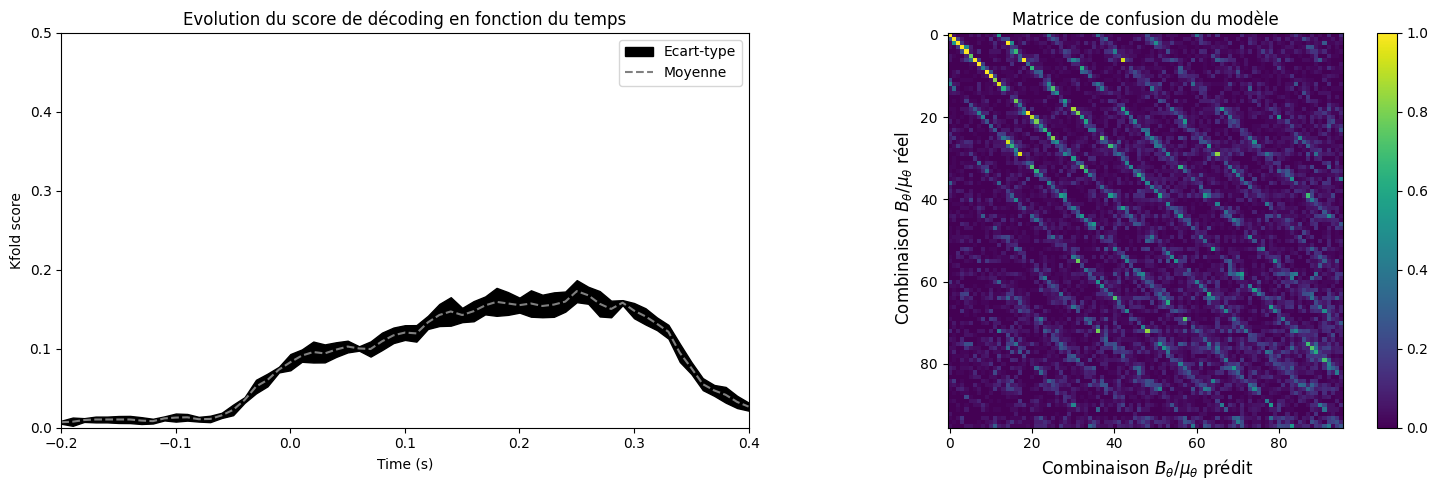

In [96]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].fill_between(timesteps,Scores_mean_theta_btheta-Scores_sd_theta_btheta,Scores_mean_theta_btheta+Scores_sd_theta_btheta,label="Ecart-type",color="black")
ax[0].plot(timesteps,Scores_mean_theta_btheta,linestyle="--",color="grey",label="Moyenne")
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,0.5)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Kfold score")
ax[0].legend()
graph=ax[1].imshow(Matrice_theta_btheta,vmin=0,vmax=1)
ax[1].set_xlabel(r" Combinaison $B_\theta/\mu_\theta$ prédit",size=12)
ax[1].set_ylabel(r" Combinaison $B_\theta/\mu_\theta$ réel",size=12)
ax[1].set_title("Matrice de confusion du modèle")
cbar=fig.colorbar(graph,ax=ax[1])
plt.tight_layout()
plt.show()

## Impove decoding with equalisation histogram.

### Décoding $\theta$ orientation for an increasing noise $B_\theta$. (Parameter of Equalisation data max = 10, nbr bins = 10)

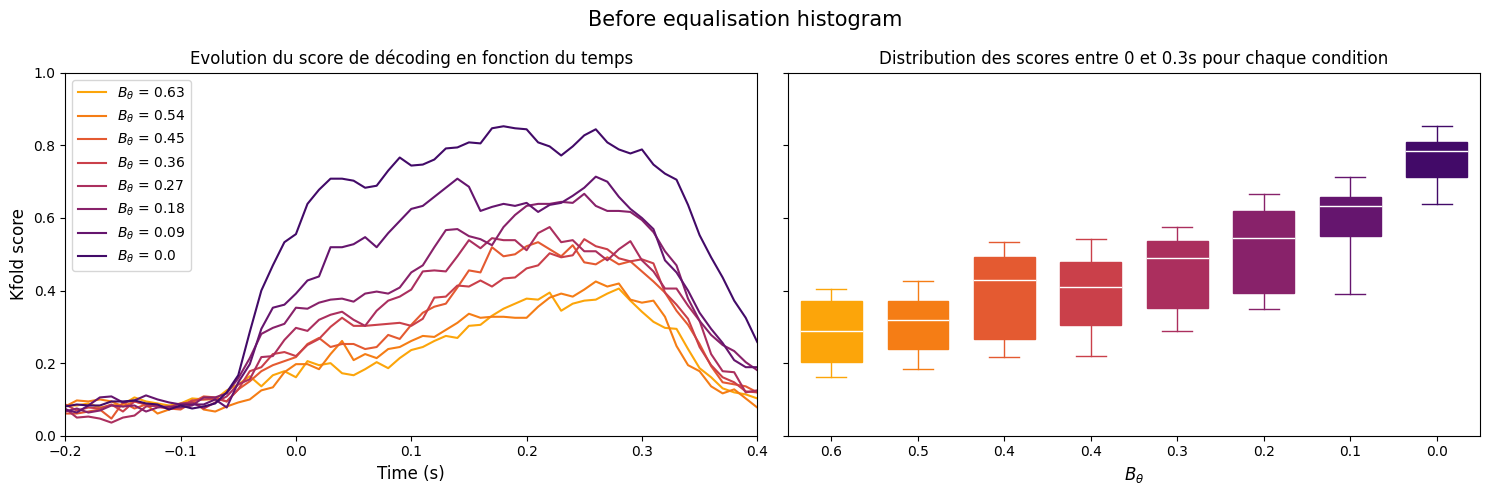

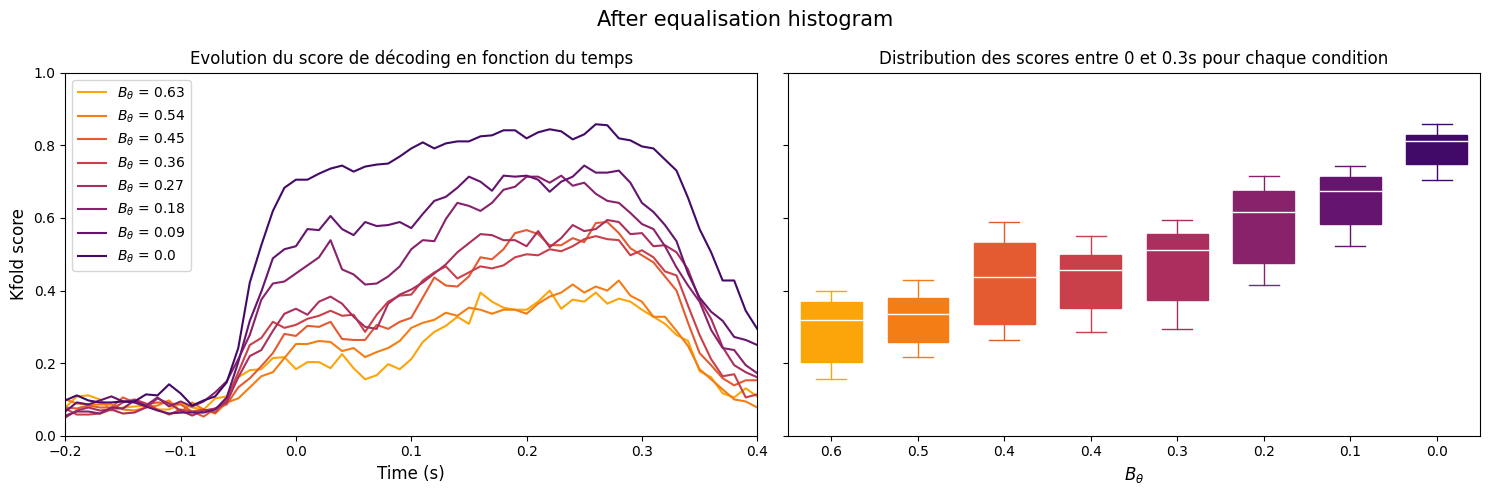

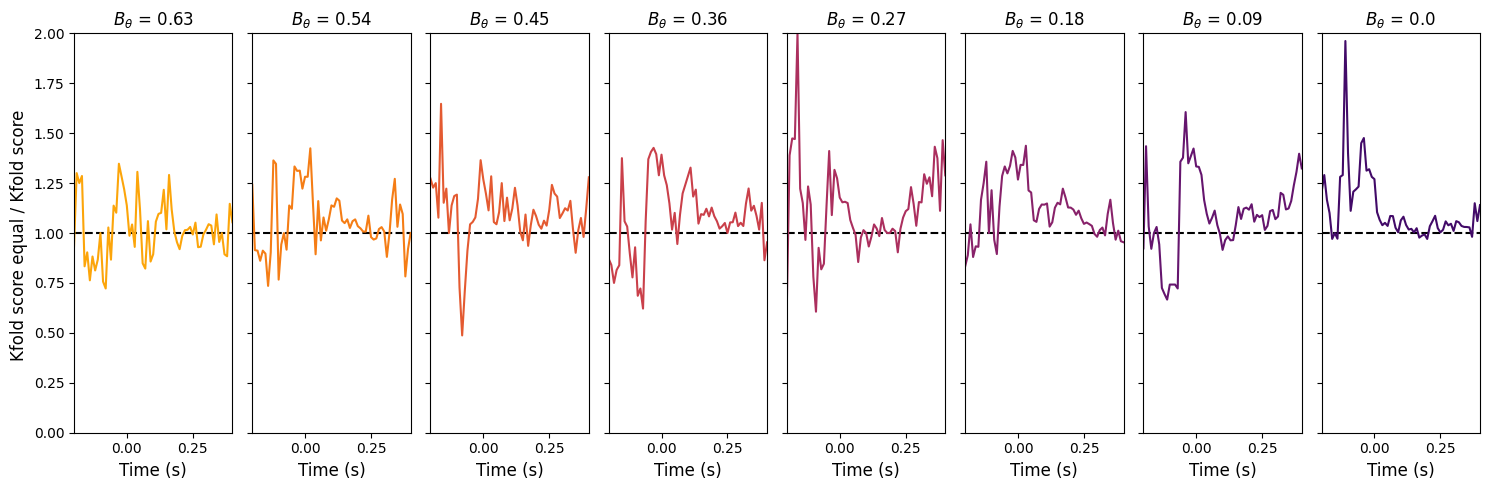

In [97]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[0].plot(timesteps,Scores_mean_theta[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

for i in range(len(B_thetas)):
    ax[1].boxplot(Scores_mean_theta[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=colors[i], color=colors[i]),
                  capprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]),
                  flierprops=dict(color=colors[i], markeredgecolor=colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(B_thetas[i],1) for i in range(len(B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)
fig.suptitle("Before equalisation histogram",size=15)
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[0].plot(timesteps,Scores_mean_theta_equal[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

for i in range(len(B_thetas)):
    ax[1].boxplot(Scores_mean_theta_equal[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=colors[i], color=colors[i]),
                  capprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]),
                  flierprops=dict(color=colors[i], markeredgecolor=colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(B_thetas[i],1) for i in range(len(B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)
fig.suptitle("After equalisation histogram",size=15)
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,len(B_thetas),figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[i].hlines(1,timesteps.min(),timesteps.max(),linestyles="dashed",colors="black")
    ax[i].plot(timesteps,Scores_mean_theta_equal[:,i]/Scores_mean_theta[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
    ax[i].set_xlim(timesteps.min(),timesteps.max())
    ax[i].set_xlabel("Time (s)",size=12)
    ax[i].set_title(r"$B_{\theta}$ = "+str(round(B_thetas[i],2)))
ax[0].set_ylim(0,2)
ax[0].set_ylabel("Kfold score equal / Kfold score ",size=12)
plt.tight_layout()
plt.show()

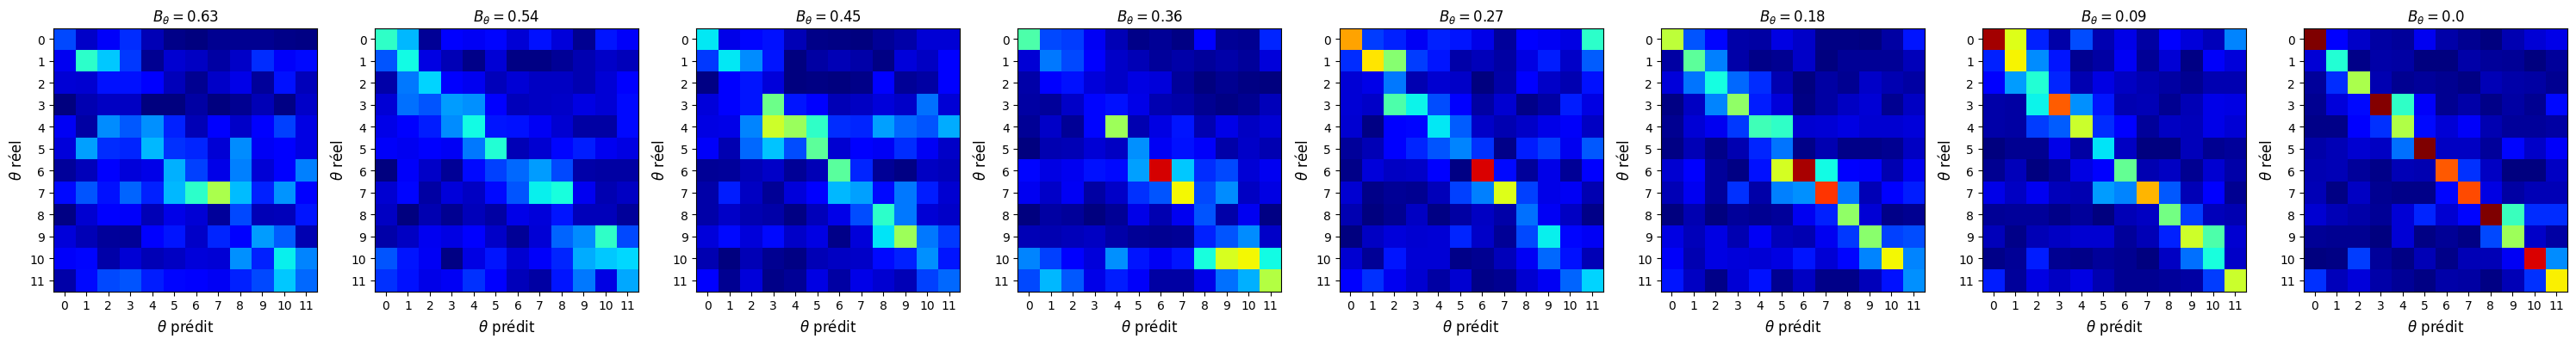

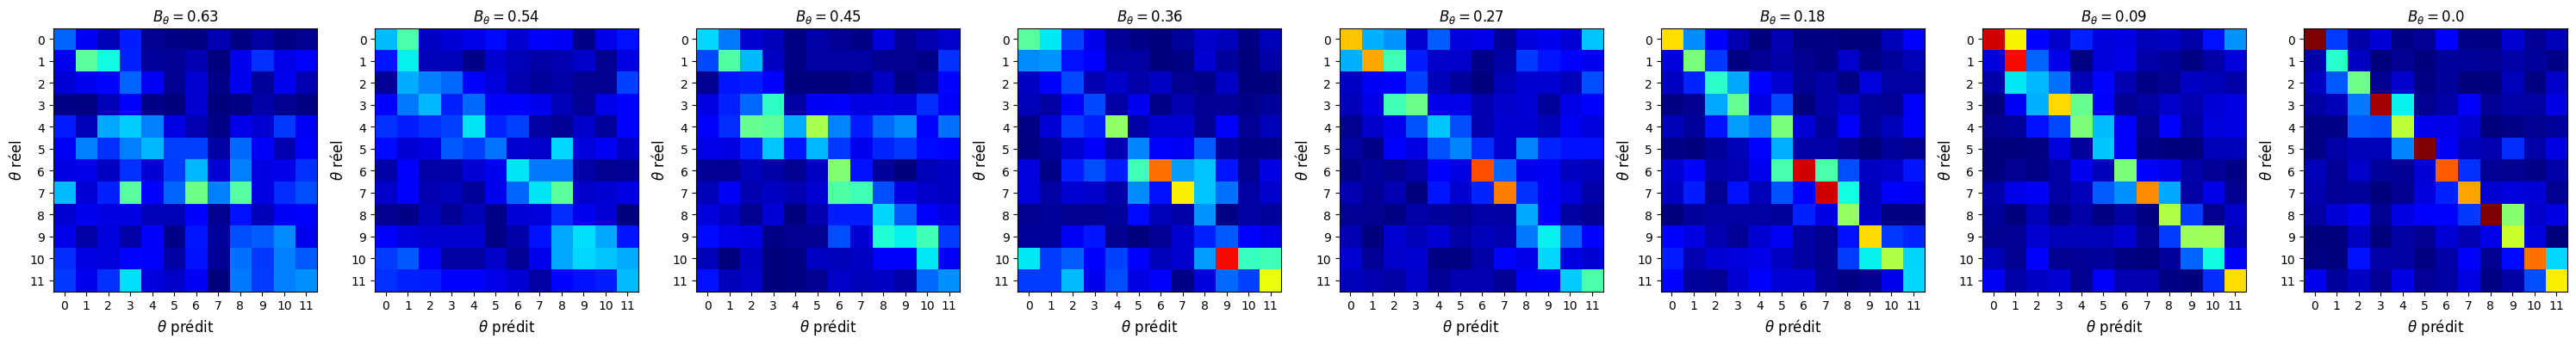

In [98]:
fig,ax=plt.subplots(1,8,figsize=(30,5))
for i in range(len(B_thetas)):
    graph=ax[i].imshow(Matrice_theta[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(B_thetas[i],2)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,12))
    ax[i].set_yticks(range(0,12))
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,8,figsize=(30,5))
for i in range(len(B_thetas)):
    graph=ax[i].imshow(Matrice_theta_equal[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(B_thetas[i],2)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,12))
    ax[i].set_yticks(range(0,12))
plt.tight_layout()
plt.show()

### Décoding $\theta$ orientation for an increasing noise $B_\theta$. (Parameter of Equalisation data max = 20, nbr bins = 20)

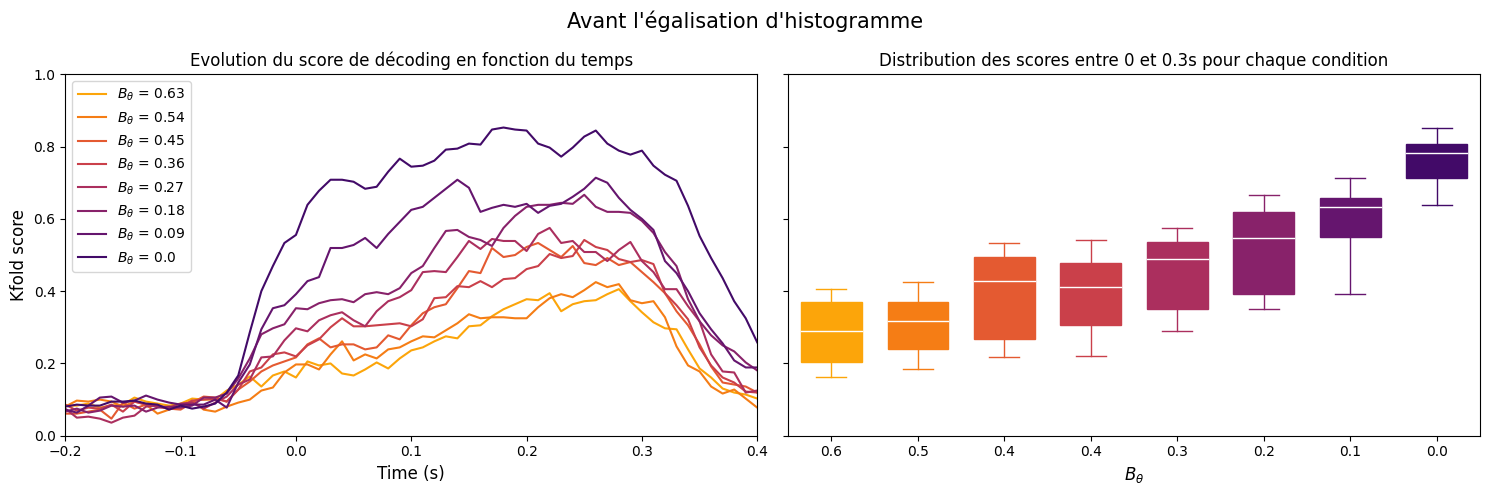

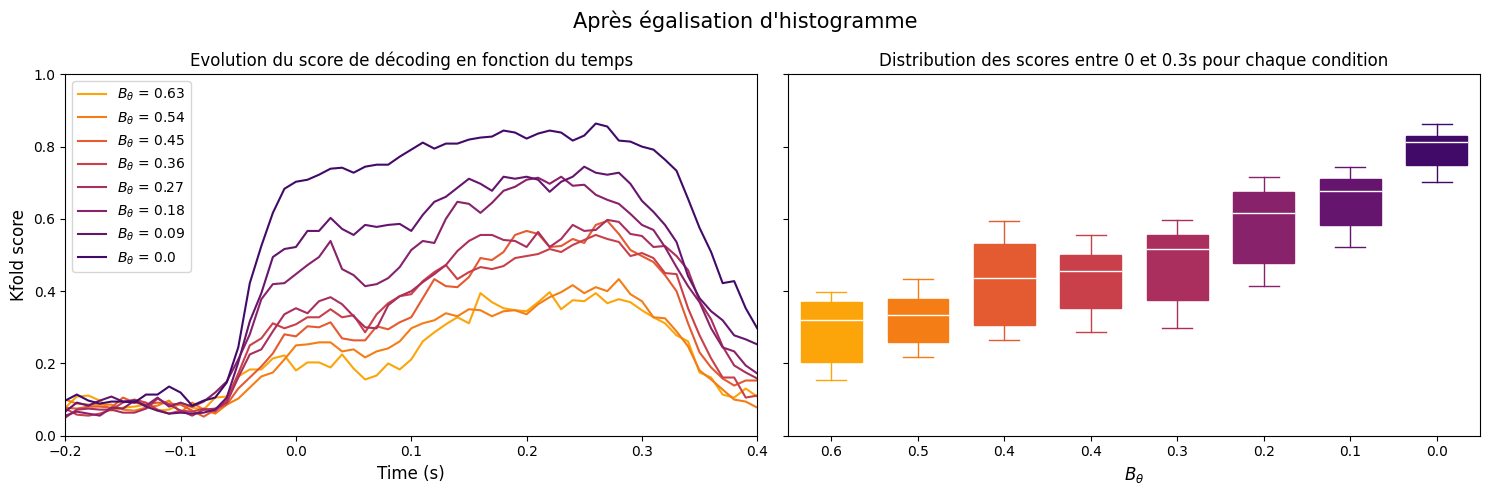

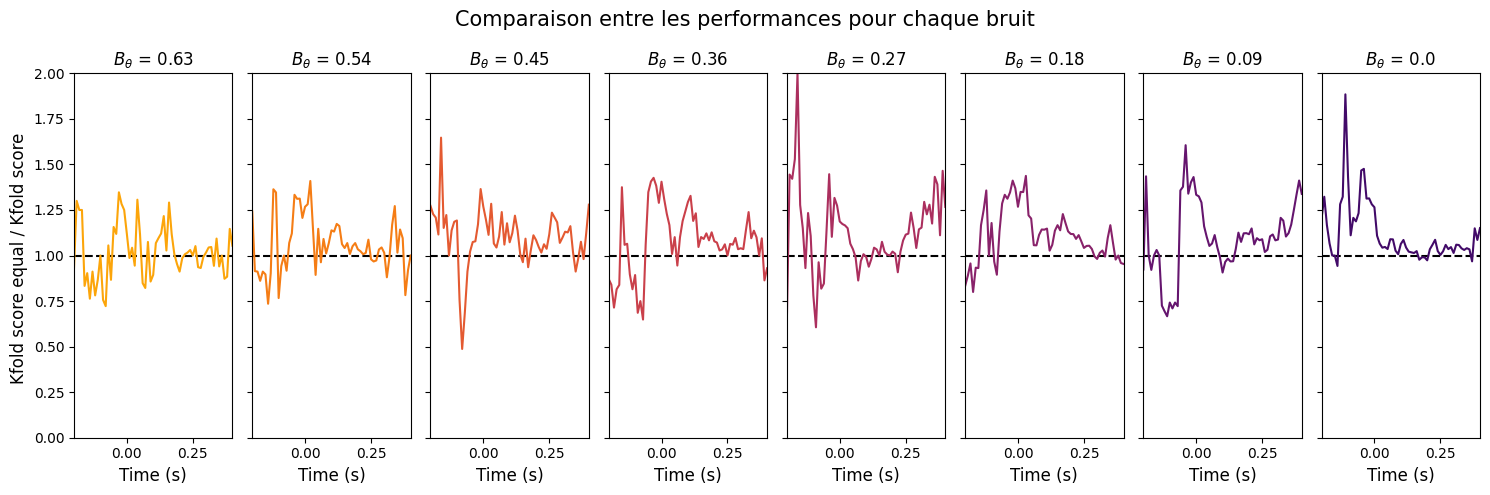

In [99]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[0].plot(timesteps,Scores_mean_theta[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

for i in range(len(B_thetas)):
    ax[1].boxplot(Scores_mean_theta[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=colors[i], color=colors[i]),
                  capprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]),
                  flierprops=dict(color=colors[i], markeredgecolor=colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(B_thetas[i],1) for i in range(len(B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)
fig.suptitle("Avant l'égalisation d'histogramme",size=15)
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[0].plot(timesteps,Scores_mean_theta_equal_2[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

for i in range(len(B_thetas)):
    ax[1].boxplot(Scores_mean_theta_equal_2[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=colors[i], color=colors[i]),
                  capprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]),
                  flierprops=dict(color=colors[i], markeredgecolor=colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(B_thetas[i],1) for i in range(len(B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)
fig.suptitle("Après égalisation d'histogramme",size=15)
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,len(B_thetas),figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[i].hlines(1,timesteps.min(),timesteps.max(),linestyles="dashed",colors="black")
    ax[i].plot(timesteps,Scores_mean_theta_equal_2[:,i]/Scores_mean_theta[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
    ax[i].set_xlim(timesteps.min(),timesteps.max())
    ax[i].set_xlabel("Time (s)",size=12)
    ax[i].set_title(r"$B_{\theta}$ = "+str(round(B_thetas[i],2)))
ax[0].set_ylim(0,2)
ax[0].set_ylabel("Kfold score equal / Kfold score ",size=12)
fig.suptitle("Comparaison entre les performances pour chaque bruit",size=15)
plt.tight_layout()
plt.show()

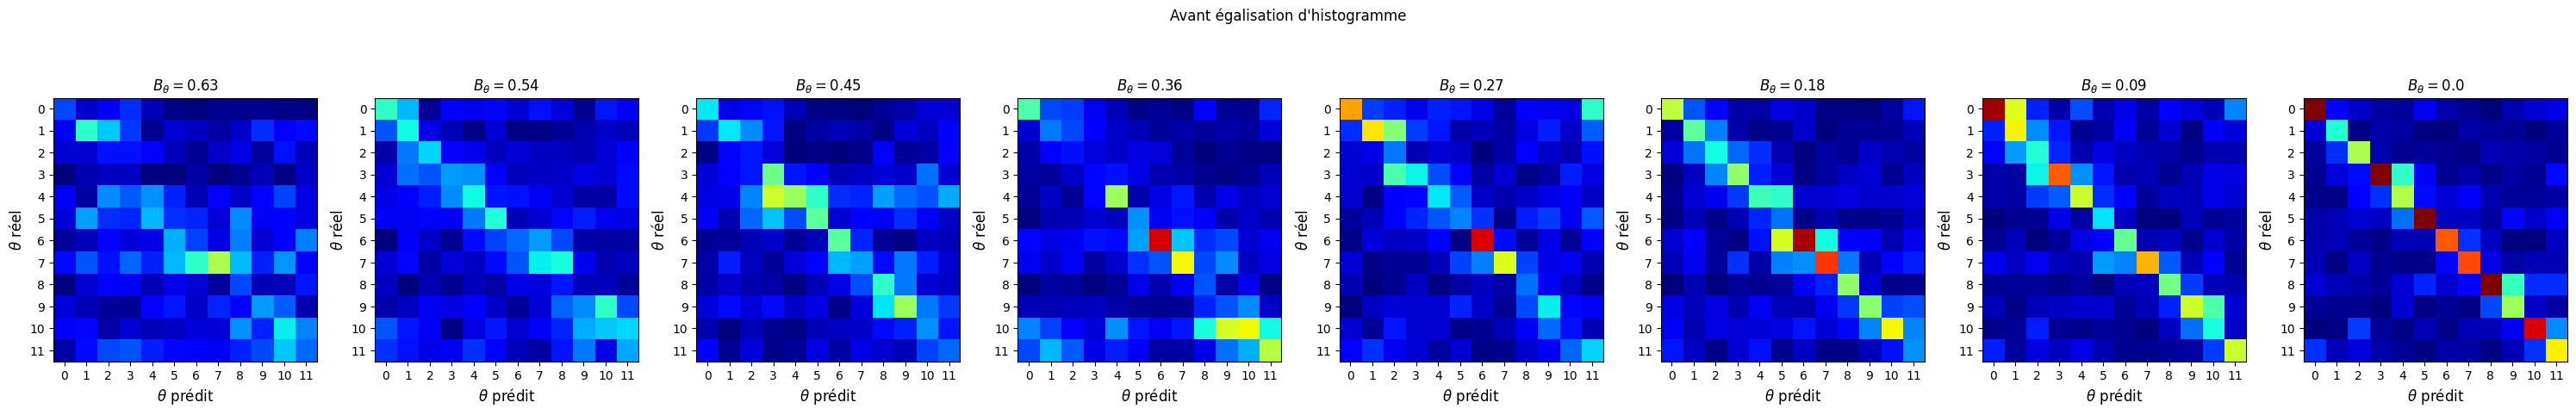

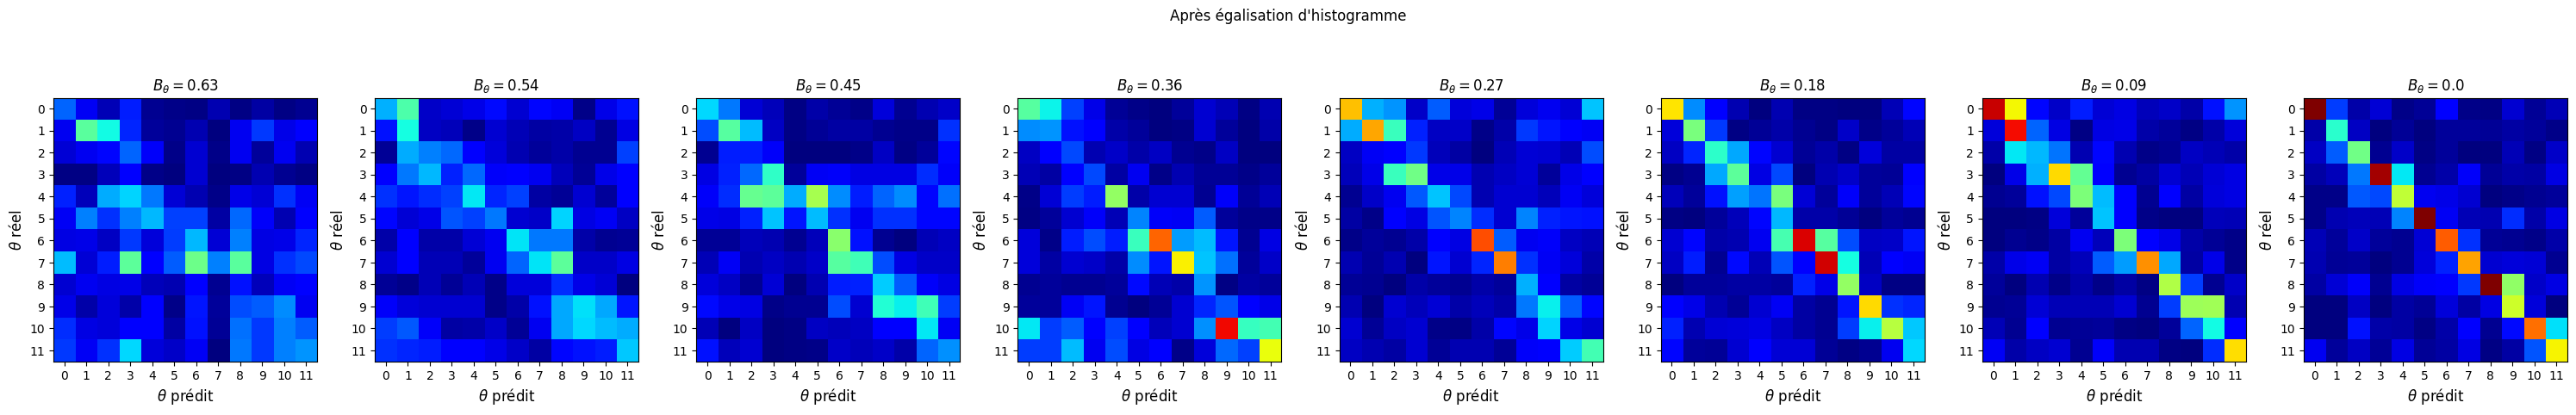

In [100]:
fig,ax=plt.subplots(1,8,figsize=(30,5))
for i in range(len(B_thetas)):
    graph=ax[i].imshow(Matrice_theta[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(B_thetas[i],2)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,12))
    ax[i].set_yticks(range(0,12))
fig.suptitle("Avant égalisation d'histogramme")
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,8,figsize=(30,5))
for i in range(len(B_thetas)):
    graph=ax[i].imshow(Matrice_theta_equal_2[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(B_thetas[i],2)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,12))
    ax[i].set_yticks(range(0,12))
fig.suptitle("Après égalisation d'histogramme")
plt.tight_layout()
plt.show()

### Comparaison between equalisations

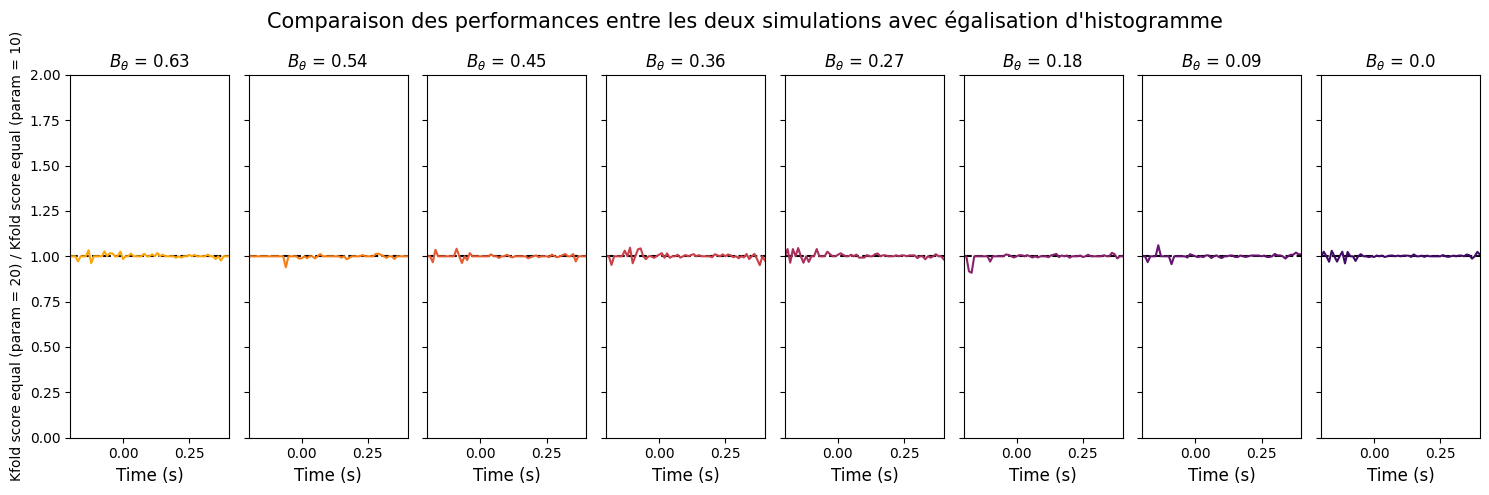

In [101]:
fig,ax=plt.subplots(1,len(B_thetas),figsize=(15,5),sharey=True)
for i in range(len(B_thetas)):
    ax[i].hlines(1,timesteps.min(),timesteps.max(),linestyles="dashed",colors="black")
    ax[i].plot(timesteps,Scores_mean_theta_equal_2[:,i]/Scores_mean_theta_equal[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],2)),color=colors[i])
    ax[i].set_xlim(timesteps.min(),timesteps.max())
    ax[i].set_xlabel("Time (s)",size=12)
    ax[i].set_title(r"$B_{\theta}$ = "+str(round(B_thetas[i],2)))
ax[0].set_ylim(0,2)
ax[0].set_ylabel("Kfold score equal (param = 20) / Kfold score equal (param = 10)",size=10)
fig.suptitle("Comparaison des performances entre les deux simulations avec égalisation d'histogramme",size=15)
plt.tight_layout()
plt.show()

### Decoding the noise $B_\theta$ from différents orientations activity $\theta$. (Parameter of Equalisation data max = 10, nbr bins = 10)

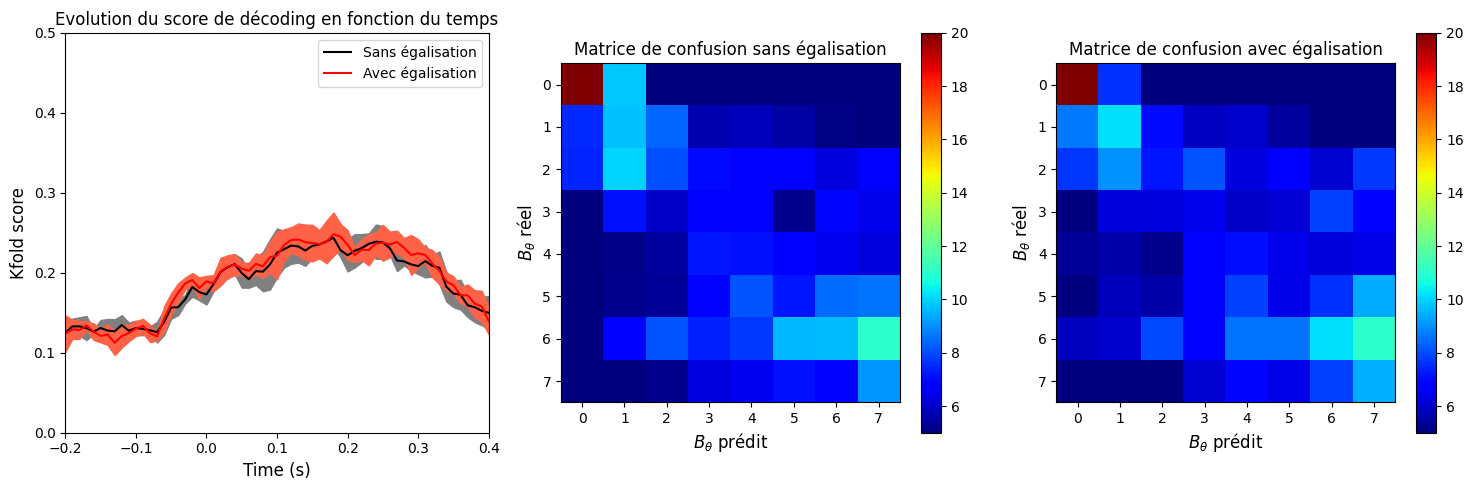

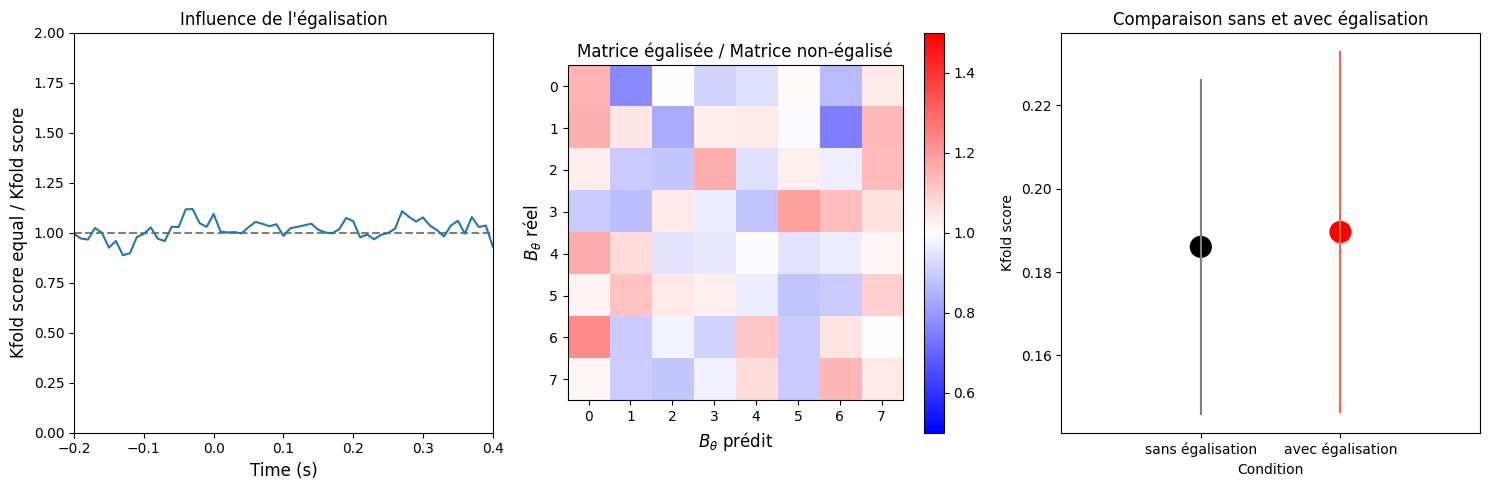

In [102]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].fill_between(timesteps,Scores_mean_btheta-Scores_sd_btheta,Scores_mean_btheta+Scores_sd_btheta,color="grey")
ax[0].fill_between(timesteps,Scores_mean_btheta_equal-Scores_sd_btheta_equal,Scores_mean_btheta_equal+Scores_sd_btheta_equal,color="tomato")
ax[0].plot(timesteps,Scores_mean_btheta,color="black",label="Sans égalisation")
ax[0].plot(timesteps,Scores_mean_btheta_equal,color="red",label="Avec égalisation")
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,0.5)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

graph1=ax[1].imshow(Matrice_btheta,cmap="jet",vmin=5,vmax=20)
ax[1].set_xlabel(r"$B_\theta$ prédit",size=12)
ax[1].set_ylabel(r"$B_\theta$ réel",size=12)
ax[1].set_title("Matrice de confusion sans égalisation")
cbar=fig.colorbar(graph1,ax=ax[1])

graph2=ax[2].imshow(Matrice_btheta_equal,cmap="jet",vmin=5,vmax=20)
ax[2].set_xlabel(r"$B_\theta$ prédit",size=12)
ax[2].set_ylabel(r"$B_\theta$ réel",size=12)
ax[2].set_title("Matrice de confusion avec égalisation")
fig.colorbar(graph2,ax=ax[2])

plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].hlines(1,timesteps.min(),timesteps.max(),linestyles="--",color="grey")
ax[0].plot(timesteps,Scores_mean_btheta_equal/Scores_mean_btheta)
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,2)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score equal / Kfold score",size=12)
ax[0].set_title("Influence de l'égalisation",size=12)

graphique=ax[1].imshow(Matrice_btheta_equal/Matrice_btheta,cmap="bwr",vmin=0.5,vmax=1.5)
ax[1].set_title("Matrice égalisée / Matrice non-égalisé",size=12)
ax[1].set_xlabel(r"$B_\theta$ prédit",size=12)
ax[1].set_ylabel(r"$B_\theta$ réel",size=12)
fig.colorbar(graphique,ax=ax[1])

ax[2].vlines(1,Scores_mean_btheta.mean()-Scores_mean_btheta.std(),Scores_mean_btheta.mean()+Scores_mean_btheta.std(),color="grey")
ax[2].vlines(2,Scores_mean_btheta_equal.mean()-Scores_mean_btheta_equal.std(),Scores_mean_btheta_equal.mean()+Scores_mean_btheta_equal.std(),color="tomato")
ax[2].scatter([1,2],[Scores_mean_btheta.mean(),Scores_mean_btheta_equal.mean()],c=["black","red"],linewidths=10)
ax[2].set_title("Comparaison sans et avec égalisation",size=12)
ax[2].set_xlim(0,3)
ax[2].set_xticks([1,2],["sans égalisation","avec égalisation"])
ax[2].set_xlabel("Condition")
ax[2].set_ylabel("Kfold score")
plt.tight_layout()
plt.show()

### Decoding $\mu_\theta$ and $B_\theta$.

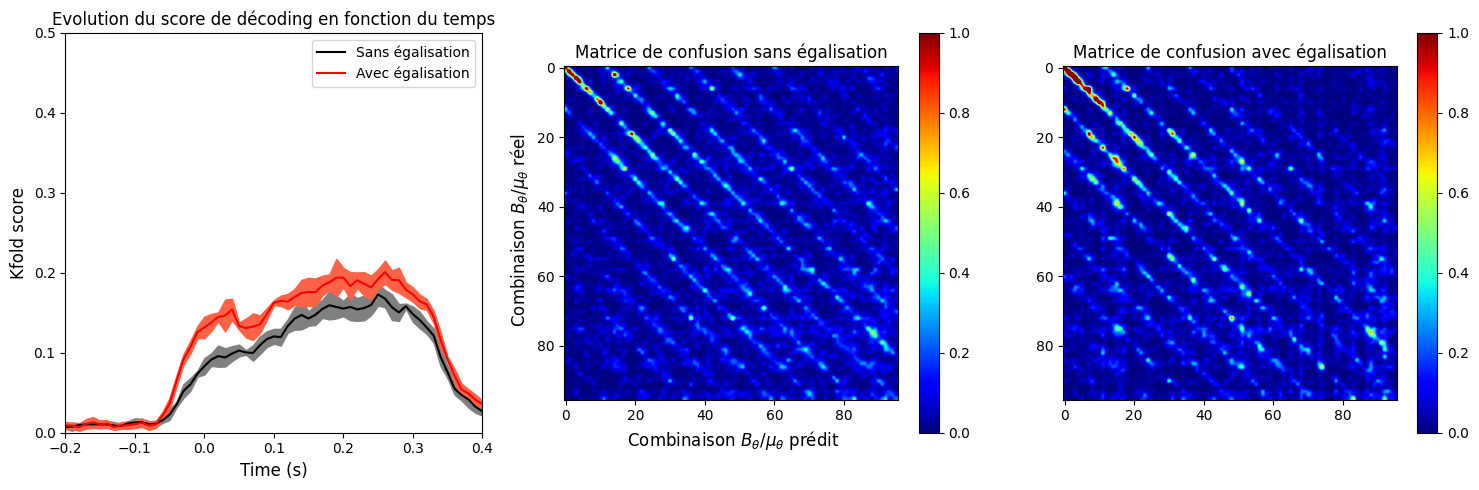

/tmp/ipykernel_107429/3228480570.py:37: RuntimeWarning: divide by zero encountered in true_divide
  graphique=ax[1].imshow(Matrice_theta_btheta_equal/Matrice_theta_btheta,cmap="bwr",vmin=0,vmax=2)
/tmp/ipykernel_107429/3228480570.py:37: RuntimeWarning: invalid value encountered in true_divide
  graphique=ax[1].imshow(Matrice_theta_btheta_equal/Matrice_theta_btheta,cmap="bwr",vmin=0,vmax=2)


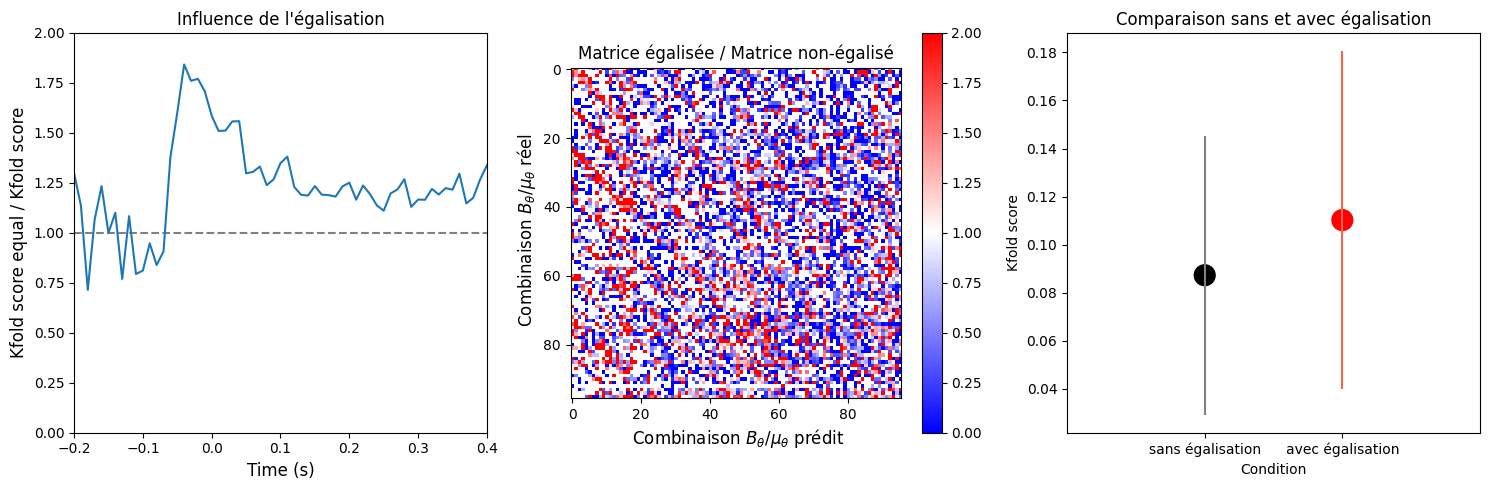

In [111]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].fill_between(timesteps,Scores_mean_theta_btheta-Scores_sd_theta_btheta,Scores_mean_theta_btheta+Scores_sd_theta_btheta,color="grey")
ax[0].fill_between(timesteps,Scores_mean_theta_btheta_equal-Scores_sd_theta_btheta_equal,Scores_mean_theta_btheta_equal+Scores_sd_theta_btheta_equal,color="tomato")
ax[0].plot(timesteps,Scores_mean_theta_btheta,color="black",label="Sans égalisation")
ax[0].plot(timesteps,Scores_mean_theta_btheta_equal,color="red",label="Avec égalisation")
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,0.5)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

graph1=ax[1].imshow(Matrice_theta_btheta,cmap="jet",vmin=0,vmax=1,interpolation="gaussian")
ax[1].set_xlabel(r" Combinaison $B_\theta/\mu_\theta$ prédit",size=12)
ax[1].set_ylabel(r" Combinaison $B_\theta/\mu_\theta$ réel",size=12)
ax[1].set_title("Matrice de confusion sans égalisation")
cbar=fig.colorbar(graph1,ax=ax[1])

graph2=ax[2].imshow(Matrice_theta_btheta_equal,cmap="jet",vmin=0,vmax=1,interpolation="gaussian")
ax[1].set_xlabel(r" Combinaison $B_\theta/\mu_\theta$ prédit",size=12)
ax[1].set_ylabel(r" Combinaison $B_\theta/\mu_\theta$ réel",size=12)
ax[2].set_title("Matrice de confusion avec égalisation")
fig.colorbar(graph2,ax=ax[2])

plt.tight_layout()
plt.show()

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].hlines(1,timesteps.min(),timesteps.max(),linestyles="--",color="grey")
ax[0].plot(timesteps,Scores_mean_theta_btheta_equal/Scores_mean_theta_btheta)
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,2)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score equal / Kfold score",size=12)
ax[0].set_title("Influence de l'égalisation",size=12)

graphique=ax[1].imshow(Matrice_theta_btheta_equal/Matrice_theta_btheta,cmap="bwr",vmin=0,vmax=2)
ax[1].set_title("Matrice égalisée / Matrice non-égalisé",size=12)
ax[1].set_xlabel(r" Combinaison $B_\theta/\mu_\theta$ prédit",size=12)
ax[1].set_ylabel(r" Combinaison $B_\theta/\mu_\theta$ réel",size=12)
fig.colorbar(graphique,ax=ax[1])

ax[2].vlines(1,Scores_mean_theta_btheta.mean()-Scores_mean_theta_btheta.std(),Scores_mean_theta_btheta.mean()+Scores_mean_theta_btheta.std(),color="grey")
ax[2].vlines(2,Scores_mean_theta_btheta_equal.mean()-Scores_mean_theta_btheta_equal.std(),Scores_mean_theta_btheta_equal.mean()+Scores_mean_theta_btheta_equal.std(),color="tomato")
ax[2].scatter([1,2],[Scores_mean_theta_btheta.mean(),Scores_mean_theta_btheta_equal.mean()],c=["black","red"],linewidths=10)
ax[2].set_title("Comparaison sans et avec égalisation",size=12)
ax[2].set_xlim(0,3)
ax[2].set_xticks([1,2],["sans égalisation","avec égalisation"])
ax[2].set_xlabel("Condition")
ax[2].set_ylabel("Kfold score")
plt.tight_layout()
plt.show()